In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

First, I read the file with the data and check:
- the first 5 rows of the data, 
- the name of the columns,
- the shape of the dataframe and
- the summary informations.
From the last command I can see that I have some columns with missed values (Title, Review Text, Division Name, Department Name and Class Name)

In [3]:
#Read the data file
rev = pd.read_csv("C:/Users/USER/Desktop/Course_Data_Scientist_Springboard/1Project_E-commerce/Womens Clothing E-Commerce Reviews.csv", index_col=0)

In [3]:
#Show the first 5 rows of the data
rev.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
# Name of columns
rev.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
# the shape of the dataframe
rev.shape

(23486, 10)

In [6]:
# Summary informations
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
# how many values are null? 
rev.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Now, I use .describe() method to explore statistically the data. Here, I discovered that the maximum age is 99 and so I decided to print the rows where the age of the shoppers is 99.

In [8]:
# Summary statistics 
rev.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [9]:
# Check the rows with Age == 99
print (rev[rev.Age == 99])

       Clothing ID  Age             Title  \
8327          1078   99  Beachy and boho!   
11545          949   99               NaN   

                                             Review Text  Rating  \
8327   I love the weight of the material; sometimes c...       5   
11545  Great quality, i didn't expect the neck to be ...       4   

       Recommended IND  Positive Feedback Count Division Name Department Name  \
8327                 1                        1       General         Dresses   
11545                1                        4       General            Tops   

      Class Name  
8327     Dresses  
11545   Sweaters  


###### What are the age of the reviewers?
I plot the distribution of age with kind='hist' and 'box' and also the density estimate of the age. I can see that the major of the reviews has around 30-50 years and the median age is 41.

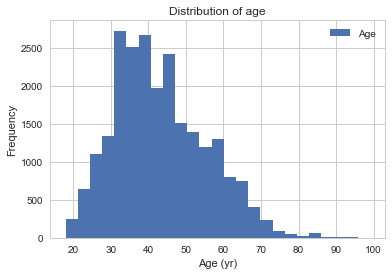

In [52]:
# Histogram to see the distribution of the age of the reviewers
rev.plot(y='Age', kind='hist', bins=25)
plt.xlabel('Age (yr)')
plt.title('Distribution of age')
plt.show()

Text(0.5,1,'Density estimate of the age')

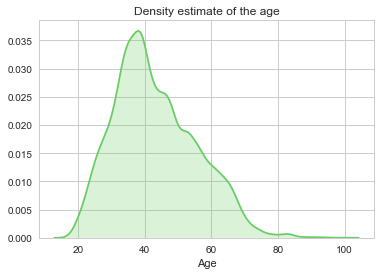

In [53]:
# Plot a filled kernel density estimate of the distribution of age
#sns.set(style="whitegrid")
sns.distplot(rev['Age'], hist=False, color="g", kde_kws={"shade": True}).set_title('Density estimate of the age')
#sns.distplot(rev['Age'], hist_kws=dict(edgecolor="k")).set_title("Distribution of Age")#

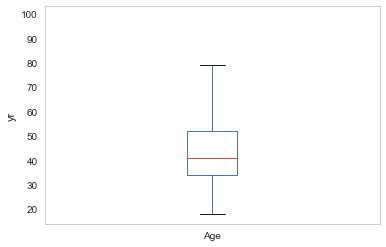

In [81]:
rev.plot(y='Age', kind='box')
plt.ylabel('yr')
plt.grid(False)
plt.show()

##### Recommended or not

In [13]:
#Group by Recommended yes and no and count them
rev.groupby('Recommended IND').count()

,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Class Name
Recommended IND,,,,,,,,,
0,4172,4172,3575,4101,4172,4172,4172,4172,4172
1,19314,19314,16101,18540,19314,19314,19300,19300,19300


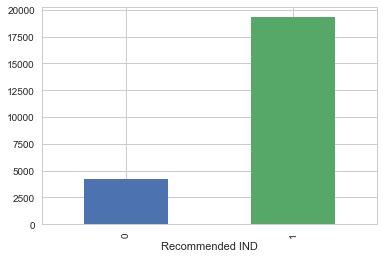

In [80]:
#Plot the result
groups = rev.groupby('Recommended IND').size()
groups.plot.bar()

In [79]:
indices = rev['Recommended IND'] == 1
yes = rev.loc[indices,:] #extract new DataFrame
indices = rev['Recommended IND'] == 0
no = rev.loc[indices,:] #extract new DataFrame

In [16]:
yes.count()

Clothing ID                19314
Age                        19314
Title                      16101
Review Text                18540
Rating                     19314
Recommended IND            19314
Positive Feedback Count    19314
Division Name              19300
Department Name            19300
Class Name                 19300
dtype: int64

In [17]:
no.count()

Clothing ID                4172
Age                        4172
Title                      3575
Review Text                4101
Rating                     4172
Recommended IND            4172
Positive Feedback Count    4172
Division Name              4172
Department Name            4172
Class Name                 4172
dtype: int64

In [18]:
#Check the result
yes.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [19]:
no.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses
22,1077,31,Not what it looks like,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses
25,697,31,Falls flat,"Loved the material, but i didnt really look at...",3,0,0,Initmates,Intimate,Lounge


[]

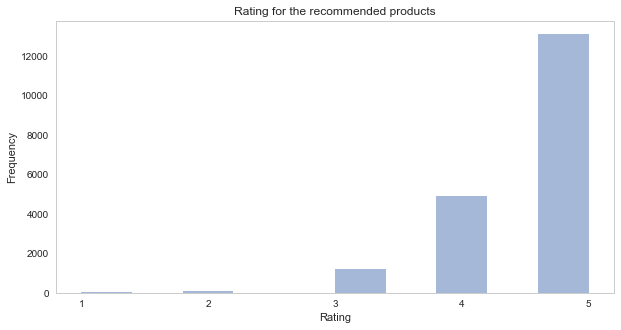

In [85]:
# Plot the rating for the recommended products
plt.subplots(figsize=(10,5))
yes['Rating'].plot(kind='hist', alpha=0.5)
plt.xlabel('Rating')
plt.title('Rating for the recommended products')
plt.xticks(np.arange(0, 6, step=1))
plt.grid(False)
plt.plot()

In [21]:
#how many recommended and not recommended products have rating 1, 2, 3, 4, 5 
num=[1,2,3,4,5]
for i in num:
    count = yes.Rating[yes.Rating == i].count()
    print ("The number of recommended products with rating = " + str(i) + " is " + str(count))
print ('##################################################')    
for i in num:
    count = no.Rating[no.Rating == i].count()
    print ("The number of no recommended products with rating = " + str(i) + " is " + str(count))
    

The number of recommended products with rating = 1 is 16
The number of recommended products with rating = 2 is 94
The number of recommended products with rating = 3 is 1189
The number of recommended products with rating = 4 is 4909
The number of recommended products with rating = 5 is 13106
##################################################
The number of no recommended products with rating = 1 is 826
The number of no recommended products with rating = 2 is 1471
The number of no recommended products with rating = 3 is 1682
The number of no recommended products with rating = 4 is 168
The number of no recommended products with rating = 5 is 25


In [22]:
#Check the review text for the recommended products but with rating 1
yes["Review Text"][yes.Rating == 1]

2427     Beautiful jacket and i got lots of compliments...
2872     Very cute top. i went down a size because for ...
5570     I love this t-shirt because it has the combina...
6216     Love the movement of the blouse and how it fal...
7740     I loved the color and design until i tried it ...
7850     This is so close to perfect, but there's a sea...
9877     I loved the dress, but just not dressy enough ...
10517    I saw this dress in the catalog and had to hav...
13607    Such a great dress. fit is flattering. the sma...
16194    This is an extremely flattering dress. i could...
16428    Love this top! it's pretty, unique and well ma...
16995    Love the jacket! so versatile! would probably ...
18676    This is a cute dress, but not for me. 1. i thi...
20649                                                  NaN
22087    Love this top! but unfortunately i returned it...
22632    Just wanted to review so people know this hood...
Name: Review Text, dtype: object

[]

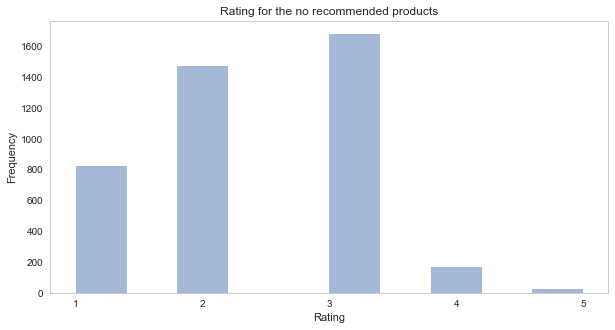

In [86]:
# Plot the rating for no recommended products
plt.subplots(figsize=(10,5))
no['Rating'].plot(kind='hist', alpha=0.5)
plt.xlabel('Rating')
plt.title('Rating for the no recommended products')
plt.xticks(np.arange(0, 6, step=1))
plt.grid(False)
plt.plot()

In [24]:
no.Rating.count()

4172

In [25]:
cloth_yes = yes['Clothing ID']
# Create a Counter of the recommended clothing ID list
cloth_yes_count = Counter(cloth_yes)
# Find the 5 most common clothing id
id_yes = cloth_yes_count.most_common(10)
print (id_yes)

[(1078, 841), (862, 661), (1094, 621), (1081, 494), (872, 478), (829, 436), (1110, 403), (895, 341), (868, 325), (850, 294)]


In [26]:
cloth_no = no['Clothing ID']
# Create a Counter of the recommended clothing ID list
cloth_no_count = Counter(cloth_no)
# Find the 5 most common clothing id
id_no = cloth_no_count.most_common(10)
print (id_no)

[(1078, 183), (862, 145), (1094, 135), (868, 105), (829, 91), (1081, 88), (1110, 77), (1095, 68), (872, 67), (867, 66)]


In [27]:
#Plot the cloth_yes_count.most_common and no one
df1 = pd.DataFrame(id_yes, columns=['Clothing ID', 'Count']).set_index('Clothing ID')
df0 = pd.DataFrame(id_no, columns=['Clothing ID', 'Count']).set_index('Clothing ID')
print (df1)
print (df0)

             Count
Clothing ID       
1078           841
862            661
1094           621
1081           494
872            478
829            436
1110           403
895            341
868            325
850            294
             Count
Clothing ID       
1078           183
862            145
1094           135
868            105
829             91
1081            88
1110            77
1095            68
872             67
867             66


In [28]:
# Merge the two dataframes
together = pd.merge(df1, df0, on ='Clothing ID', suffixes=['_yes', '_no'], how='outer')
print(together)

             Count_yes  Count_no
Clothing ID                     
1078             841.0     183.0
862              661.0     145.0
1094             621.0     135.0
1081             494.0      88.0
872              478.0      67.0
829              436.0      91.0
1110             403.0      77.0
895              341.0       NaN
868              325.0     105.0
850              294.0       NaN
1095               NaN      68.0
867                NaN      66.0


The first two subplots I don't think add informations: maybe it's better to keep only the last plot to compare the recommended products and not

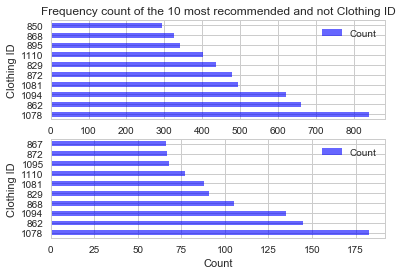

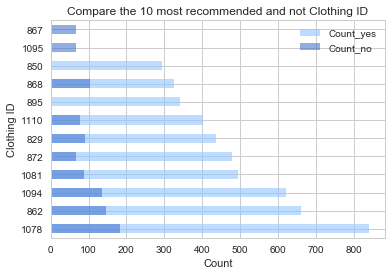

In [29]:
#Plot the first 10 most common Clothing ID recommended and not
plt.subplot(2, 1, 1) 
sns.set(style="whitegrid")
#sns.set_color_codes("pastel")
p1 = df1['Count'].plot(kind='barh', alpha=0.6, stacked=True, color='b', legend=True)
plt.title('Frequency count of the 10 most recommended and not Clothing ID')
plt.subplot(2, 1, 2)
#sns.set_color_codes("muted")
p2 = df0['Count'].plot(kind='barh', alpha=0.6, stacked=True, color='b', legend=True)
plt.xlabel('Count')
plt.show()

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
p1 = together['Count_yes'].plot(kind='barh', alpha=0.6, stacked=True, color='b', legend=True)
sns.set_color_codes("muted")
p2 = together['Count_no'].plot(kind='barh', alpha=0.6, stacked=True, color='b', legend=True)
plt.xlabel('Count')
plt.title('Compare the 10 most recommended and not Clothing ID')
plt.show()

##### Rating distribution

Text(0.5,1,'Distribution of rating')

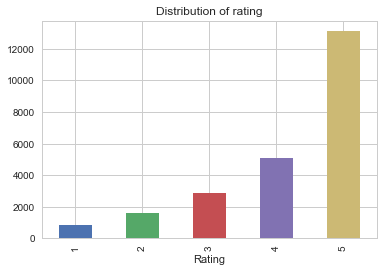

In [30]:
#Check the distribution of rating
groups = rev.groupby('Rating').size()
groups.plot.bar()
plt.title('Distribution of rating')

##### Distribution of reviews per Division Name, Class Name and Department Name

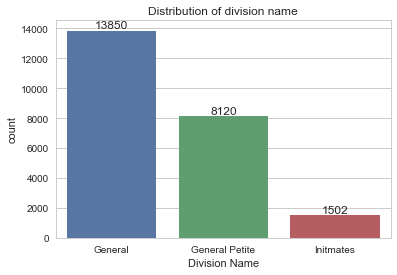

In [31]:
#Check the distribution of reviews per division name
ax = sns.countplot(x ='Division Name', data = rev, order = rev['Division Name'].value_counts().index)
plt.title('Distribution of division name')
x=rev['Division Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

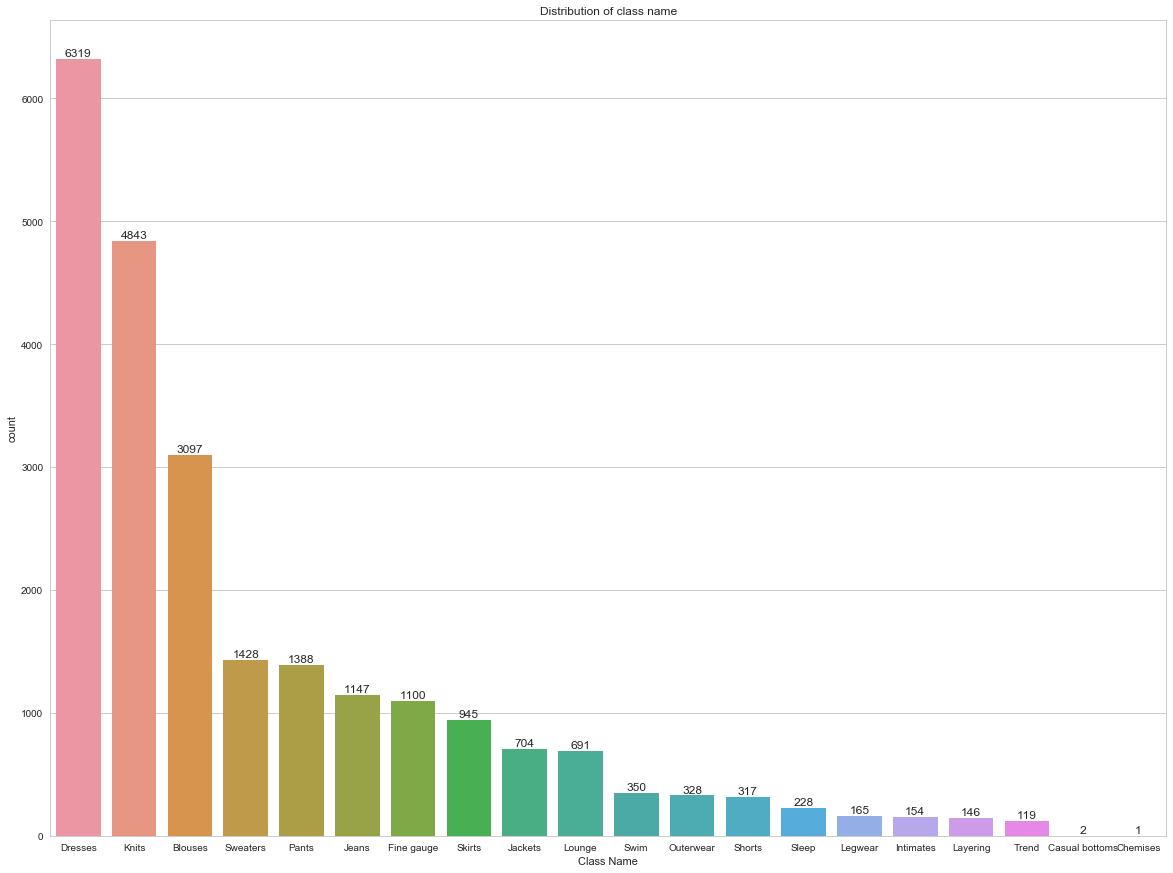

In [32]:
#Check the distribution of reviews per class name
plt.subplots(figsize=(20,15))
ax = sns.countplot(x = 'Class Name', data = rev, order = rev['Class Name'].value_counts().index)
plt.title('Distribution of class name')
x=rev['Class Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

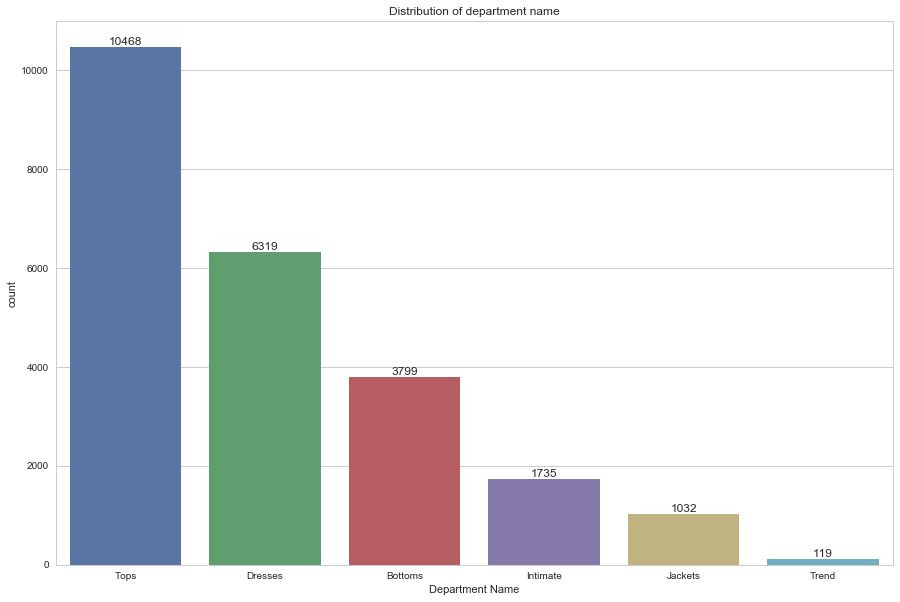

In [33]:
#Check the number of reviews per Department Name 
plt.subplots(figsize=(15,10))
ax = sns.countplot(x = 'Department Name', data = rev, order = rev['Department Name'].value_counts().index)
plt.title('Distribution of department name')
x=rev['Department Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

##### Department, Division Name and Class Name where each age group tends to shop the most: I divided the data in 3 subgroups

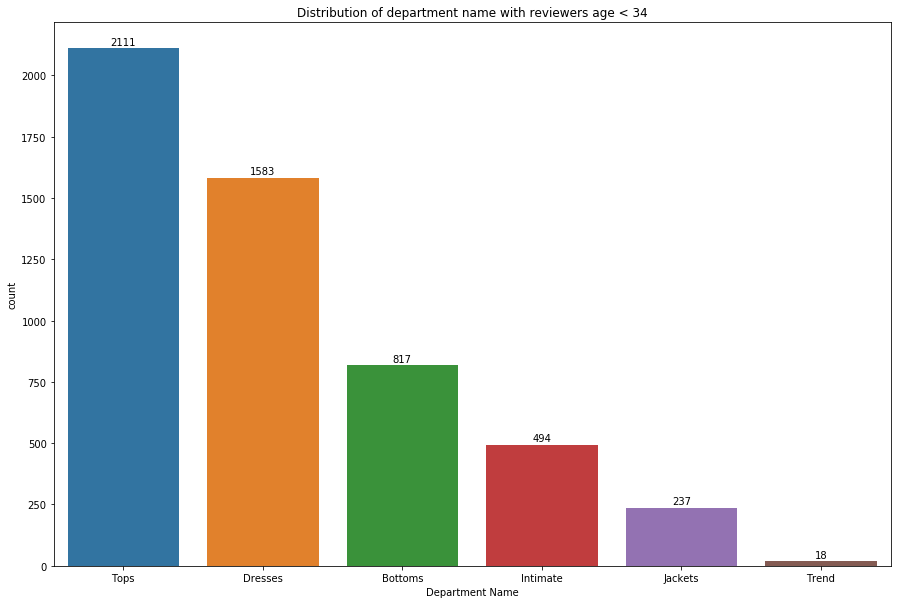

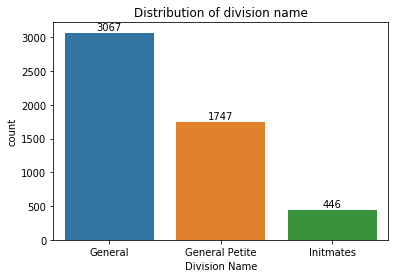

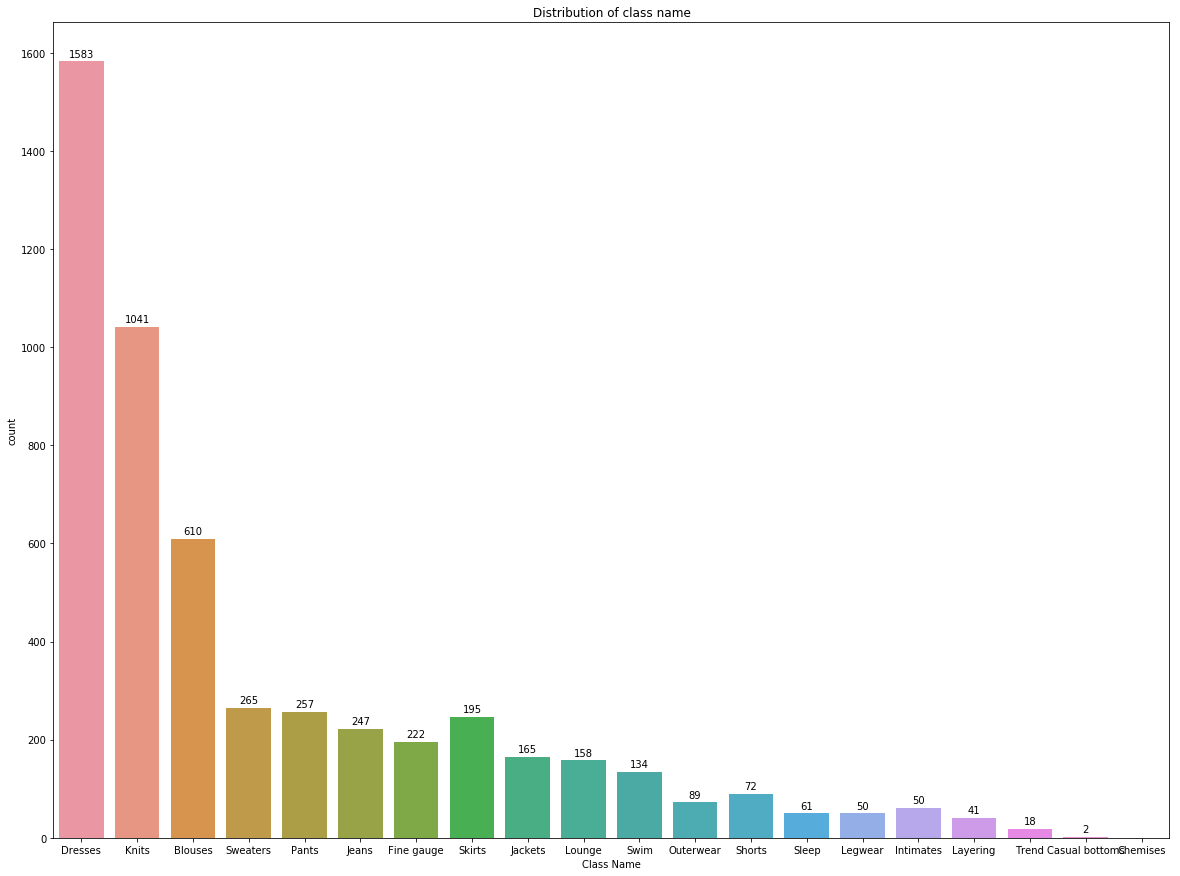

In [16]:
#Check the number of reviews per Department Name with reviewers age < 34 
plt.subplots(figsize=(15,10))
data = rev[rev.Age < 34]
ax = sns.countplot(x = 'Department Name', data = data, order = data['Department Name'].value_counts().index)
plt.title('Distribution of department name with reviewers age < 34')
x=data['Department Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

#Check the distribution of reviews per division name
ax = sns.countplot(x ='Division Name', data = data, order = data['Division Name'].value_counts().index)
plt.title('Distribution of division name')
x=data['Division Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

#Check the distribution of reviews per class name
plt.subplots(figsize=(20,15))
ax = sns.countplot(x = 'Class Name', data = data, order = data['Class Name'].value_counts().index)
plt.title('Distribution of class name')
x=data['Class Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

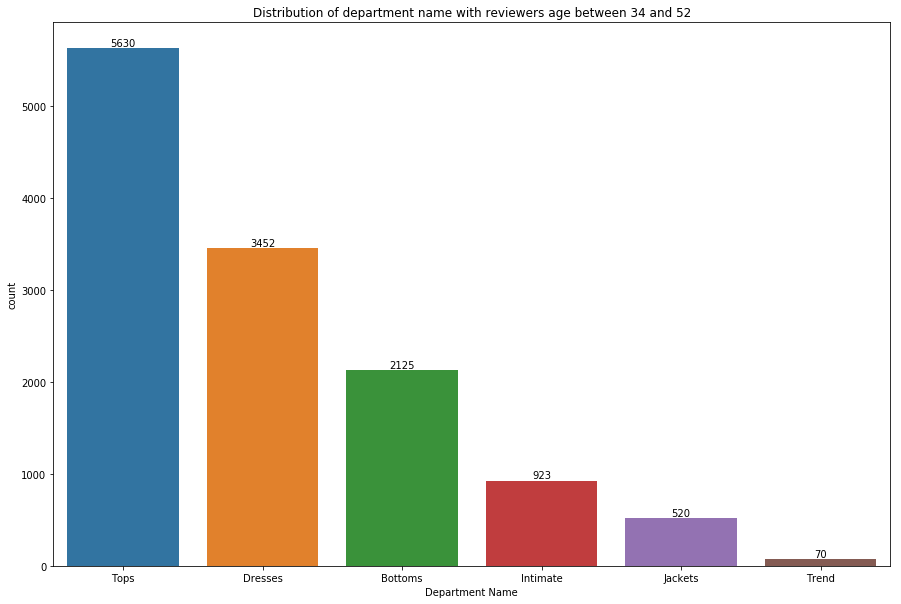

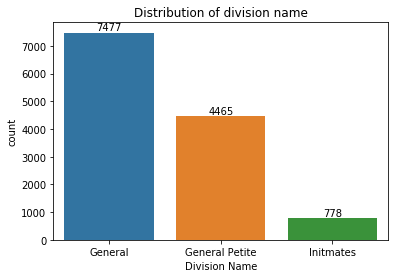

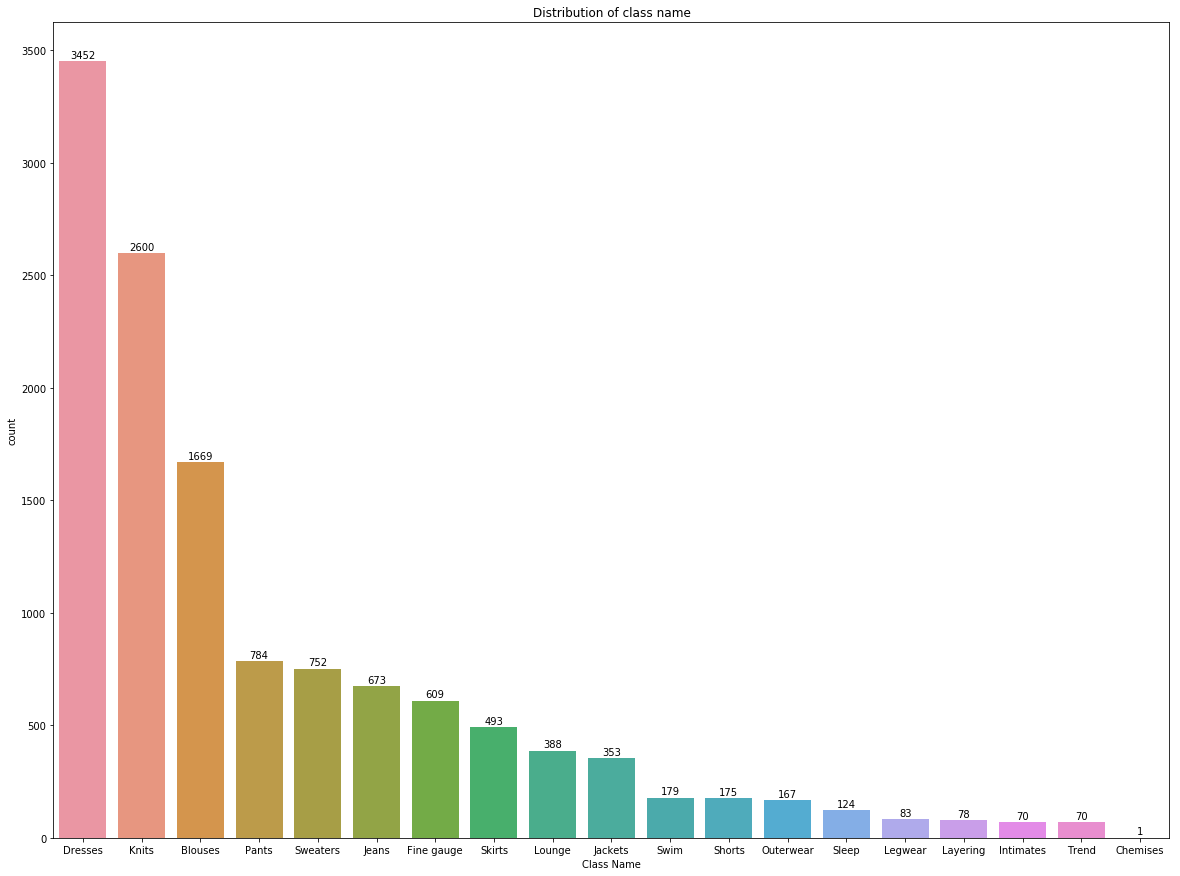

In [20]:
#Check the number of reviews per Department Name with reviewers age between 34 and 52 
plt.subplots(figsize=(15,10))
data = rev[(rev.Age >= 34) & (rev.Age <= 52)]
ax = sns.countplot(x = 'Department Name', data = data, order = data['Department Name'].value_counts().index)
plt.title('Distribution of department name with reviewers age between 34 and 52')
x=data['Department Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

#Check the distribution of reviews per division name
ax = sns.countplot(x ='Division Name', data = data, order = data['Division Name'].value_counts().index)
plt.title('Distribution of division name')
x=data['Division Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

#Check the distribution of reviews per class name
plt.subplots(figsize=(20,15))
ax = sns.countplot(x = 'Class Name', data = data, order = data['Class Name'].value_counts().index)
plt.title('Distribution of class name')
x=data['Class Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

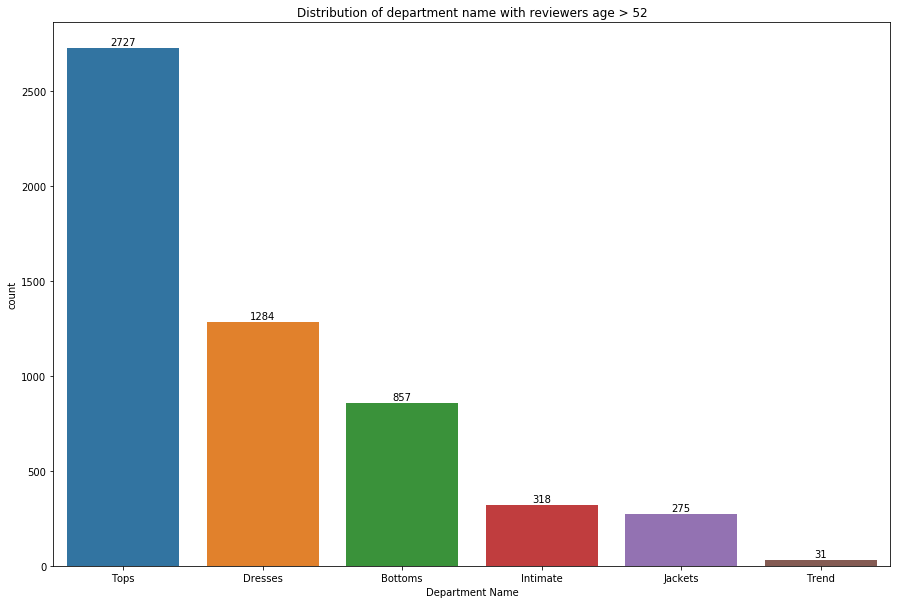

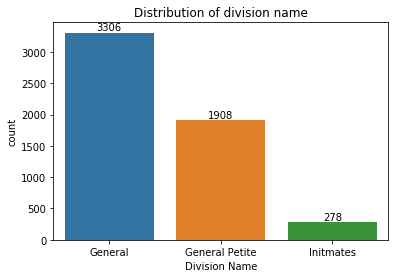

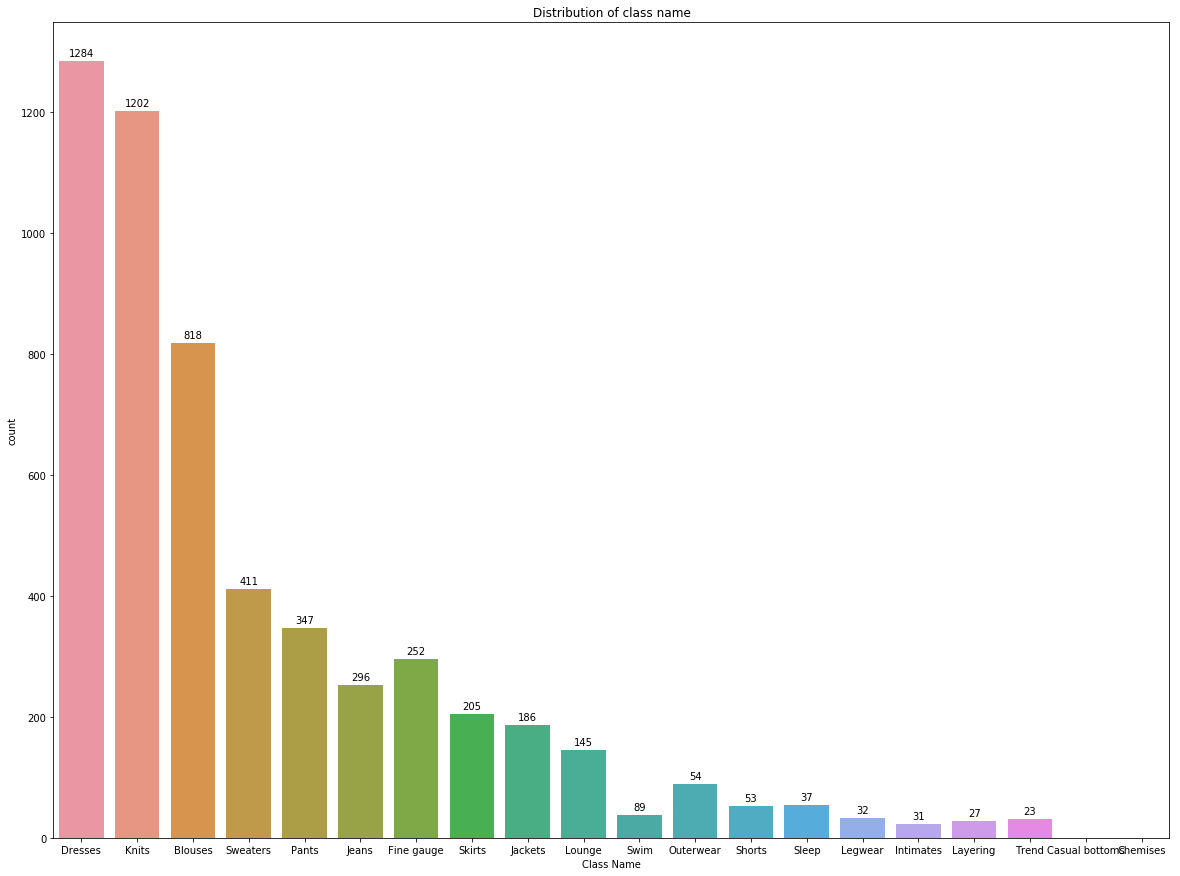

In [18]:
#Check the number of reviews per Department Name with reviewers age > 52 
plt.subplots(figsize=(15,10))
data = rev[rev.Age > 52 ]
ax = sns.countplot(x = 'Department Name', data = data, order = data['Department Name'].value_counts().index)
plt.title('Distribution of department name with reviewers age > 52')
x=data['Department Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

#Check the distribution of reviews per division name
ax = sns.countplot(x ='Division Name', data = data, order = data['Division Name'].value_counts().index)
plt.title('Distribution of division name')
x=data['Division Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

#Check the distribution of reviews per class name
plt.subplots(figsize=(20,15))
ax = sns.countplot(x = 'Class Name', data = data, order = data['Class Name'].value_counts().index)
plt.title('Distribution of class name')
x=data['Class Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

###### Now, consider the Positive feedback Count

Text(0.5,1,'Density estimate of the Positive Feedback Count')

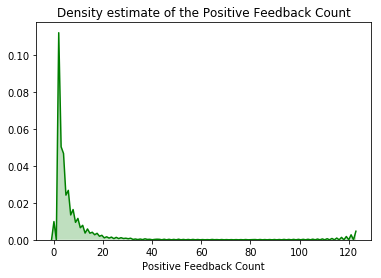

In [4]:
sns.distplot(rev['Positive Feedback Count'], hist=False, color="g", kde_kws={"shade": True}).set_title('Density estimate of the Positive Feedback Count')

NEXT: 
Positive Feedback Count Distribution by Rating, Department Name, Recommended IND, and Class Name